In [1]:
'''pregnancies
glucose
blood pressure
skin thickness
insulin
BMI
Diabetes Pedigree Function
Age
Outcome'''

'pregnancies\nglucose\nblood pressure\nskin thickness\ninsulin\nBMI\nDiabetes Pedigree Function\nAge\nOutcome'

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# data preparation

## training data
X_train_df = pd.read_csv('Diabetes_Xtrain.csv')
Y_train_df = pd.read_csv('Diabetes_Ytrain.csv')

X_train = X_train_df.values
Y_train = Y_train_df.values
Y_train = Y_train[:,0]

In [5]:
# data understanding
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               576 non-null    int64  
 1   Glucose                   576 non-null    int64  
 2   BloodPressure             576 non-null    int64  
 3   SkinThickness             576 non-null    int64  
 4   Insulin                   576 non-null    int64  
 5   BMI                       576 non-null    float64
 6   DiabetesPedigreeFunction  576 non-null    float64
 7   Age                       576 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 36.1 KB


In [6]:
Y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Outcome  576 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [8]:
np.unique(Y_train)

array([0, 1], dtype=int64)

In [48]:
## testing data
X_test_df = pd.read_csv('Diabetes_Xtest.csv')

X_test = X_test_df.values

In [49]:
# knn function
def dist(x1, x2):
    return np.sqrt(sum((x1 - x2)**2))

def knn(X, Y, queryPoint, k = 7):
    
    val = []
    size = X.shape[0]
    
    for i in range(size):
        d = dist(queryPoint, X[i])
        val.append((d, Y[i]))
        
    val = sorted(val)
    
    # take first k value
    val = val[:k]
    
    # convert list to numpy array
    val = np.array(val)
    
    # find unique output and there frequency
    counts = np.unique(val[:,1], return_counts=True)
    
    index = counts[1].argmax()
    pred = counts[0][index]
    
    return pred

In [52]:
pred = knn(X_train, Y_train, X_test[0])

In [53]:
pred

1.0

In [61]:
# exporting all the predictions as csv
test_size = X_test.shape[0]
lst = []

for i in range(test_size):
    pred = knn(X_train, Y_train, X_test[i])
    lst.append(int(pred))
    print("", i, end = "\r")
    
outcome = {
    "outputs": np.array(lst)
}

df = pd.DataFrame(outcome, dtype = 'uint8')
df.to_csv('output.csv', index = False)

 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191

classification using neural network

In [12]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam

In [31]:
model = Sequential()
model.add(Input(X_train.shape[1]))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # its binary classification problem
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [32]:
print("no of samples: %d" %X_train.shape[0])
hist = model.fit(X_train, Y_train, epochs=100, validation_split=0.2, use_multiprocessing=True)

no of samples: 576
Epoch 1/100
15/15 [==============================] - 5s 114ms/step - loss: 2.5284 - accuracy: 0.5804 - val_loss: 2.4454 - val_accuracy: 0.5345
Epoch 2/100
15/15 [==============================] - 1s 59ms/step - loss: 1.4490 - accuracy: 0.6065 - val_loss: 1.0792 - val_accuracy: 0.5690
Epoch 3/100
15/15 [==============================] - 1s 56ms/step - loss: 0.8987 - accuracy: 0.5652 - val_loss: 0.9039 - val_accuracy: 0.5431
Epoch 4/100
15/15 [==============================] - 1s 74ms/step - loss: 0.7870 - accuracy: 0.6413 - val_loss: 0.8595 - val_accuracy: 0.5603
Epoch 5/100
15/15 [==============================] - 1s 55ms/step - loss: 0.7692 - accuracy: 0.6478 - val_loss: 0.8127 - val_accuracy: 0.6207
Epoch 6/100
15/15 [==============================] - 1s 66ms/step - loss: 0.7461 - accuracy: 0.6348 - val_loss: 1.1089 - val_accuracy: 0.5000
Epoch 7/100
15/15 [==============================] - 1s 55ms/step - loss: 0.7457 - accuracy: 0.6804 - val_loss: 0.7933 - val_acc

15/15 [==============================] - 1s 60ms/step - loss: 0.5051 - accuracy: 0.7717 - val_loss: 0.6568 - val_accuracy: 0.6983
Epoch 59/100
15/15 [==============================] - 1s 53ms/step - loss: 0.5292 - accuracy: 0.7543 - val_loss: 0.7217 - val_accuracy: 0.6897
Epoch 60/100
15/15 [==============================] - 1s 59ms/step - loss: 0.5152 - accuracy: 0.7478 - val_loss: 0.6303 - val_accuracy: 0.6897
Epoch 61/100
15/15 [==============================] - 1s 67ms/step - loss: 0.5073 - accuracy: 0.7696 - val_loss: 0.6528 - val_accuracy: 0.7069
Epoch 62/100
15/15 [==============================] - 1s 70ms/step - loss: 0.5218 - accuracy: 0.7435 - val_loss: 0.6414 - val_accuracy: 0.6983
Epoch 63/100
15/15 [==============================] - 1s 54ms/step - loss: 0.5172 - accuracy: 0.7630 - val_loss: 0.6781 - val_accuracy: 0.6810
Epoch 64/100
15/15 [==============================] - 1s 60ms/step - loss: 0.5249 - accuracy: 0.7370 - val_loss: 0.6360 - val_accuracy: 0.7069
Epoch 65/100

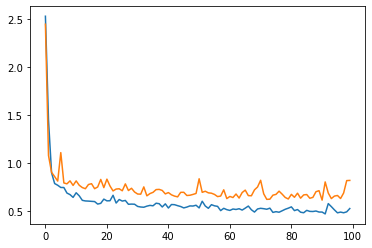

In [35]:
plt.plot(hist.history['loss'], label="training loss")
plt.plot(hist.history['val_loss'], label="validation loss")
plt.show()

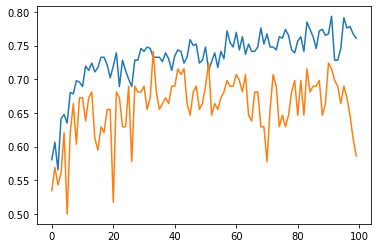

In [34]:
plt.plot(hist.history['accuracy'], label="training loss")
plt.plot(hist.history['val_accuracy'], label="validation loss")
plt.show()

In [36]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
# the accuracy on validation set is just about 70%
# which is not great at all

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr_model = LogisticRegression()

In [40]:
print(X_train.shape, Y_train.shape)

(576, 8) (576,)


In [42]:
lr_model.fit(X_train, Y_train)

AttributeError: 'str' object has no attribute 'decode'